This notebook demonstrates the process of clustering numerical data using the KMeans algorithm, Agglomerative Clustering and PCA with Kmeans from the scikit-learn library and visualizing the results through a plots. The notebook begins by loading the data and preprocessing it as necessary. It then applies the various different algorithm to cluster the wine data into a specified number of clusters. The notebook uses the matplotlib and seaborn library to create a plot that visualizes the relationship between two numerical columns. The plot provides insight into the clustering results and helps to understand the distribution of the data points within each cluster. Notebook uses Silhouette Score as a metric, which used to calculate the goodness of a clustering technique. It provides a measure of how well-separated the clusters are in a clustering result. The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Data Standardization using Z - Score normlization ¶
Data standardization, also known as data normalization, is a preprocessing step in which the features of a dataset are scaled or transformed to have a mean of 0 and a standard deviation of 1. Standardizing the data is important, especially when working with algorithms that are sensitive to the scale of the input features, such as K-Means, Support Vector Machines (SVM), and Principal Component Analysis (PCA).

In Wine data, data is not standardized. Proline feature values are all above 250, some feature values are very small. As some Algorithms are sensitive to scale of input features, we need to standardize data. There are several methods to normalization like min-max normalization, z-score normalization or mean normalization. Here we used Z-score normalization also known as Standardization method.

Agglomerative Clustering a hierarchical clustering algorithm ¶
Agglomerative Clustering is a hierarchical clustering algorithm that builds a hierarchy of clusters. The algorithm starts with each data point as a single cluster and successively merges the closest pairs of clusters until a single cluster containing all data points is formed. This hierarchical structure is often represented as a dendrogram.

Principal Component Analysis with Kmeans ¶
Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in machine learning and data analysis. It transforms high-dimensional data into a lower-dimensional representation, capturing the most important information in the data.


 Introduction
k-means is an unsupervised machine learning algorithm used to find groups of observations (clusters) that share similar characteristics. What is the meaning of unsupervised learning? It means that the observations given in the data set are unlabeled, there is no outcome to be predicted. We are going to use a Wine data set to cluster different types of wines. This data set contains the results of a chemical analysis of wines grown in a specific area of Italy.

Sobre o dataset

Álcool (Alchool):
O teor de álcool no vinho. Este parâmetro mede a quantidade de etanol no vinho e influencia sua força.

Ácido Málico (xx):
A quantidade de ácido málico no vinho. O ácido málico confere frescor e vivacidade ao vinho.

Cinzas (Зxx):
A quantidade de substâncias minerais (cinzas) no vinho após a evaporação da água e a queima dos resíduos. Isso reflete a mineralidade do vinho.

Alcalinidade das Cinzas (xxx):
A alcalinidade das cinzas no vinho. A alcalinidade mede o nível de pH do vinho e influencia suas características gustativas.

Magnésio (xxx):
A quantidade de magnésio no vinho. O magnésio é um dos micronutrientes que podem influenciar o sabor e o aroma do vinho.

Fenóis Totais (xxx):
A quantidade total de compostos fenólicos no vinho. Os fenóis são antioxidantes e podem influenciar o sabor e a cor do vinho.

Flavonoides (xxx):
A quantidade de flavonoides no vinho. Os flavonoides também são compostos fenólicos e podem contribuir para o sabor e a cor do vinho, além de possuírem propriedades antioxidantes.

Fenóis Não Flavonoides (xx):
A quantidade de compostos fenólicos não flavonoides no vinho.

Proantocianidinas (xxx):
A quantidade de proantocianidinas no vinho. As proantocianidinas também pertencem ao grupo de compostos fenólicos.

Intensidade da Cor (Иxxx):
A intensidade da cor do vinho, medida como a absorção de luz em um determinado comprimento de onda. Este parâmetro está relacionado à profundidade da cor do vinho.

Matiz (xxx):
O matiz do vinho, medido na escala de cores. Este valor pode variar de laranja a violeta e está relacionado à tonalidade da cor do vinho.

OD280/OD315 de Vinhos Diluidos (xxx):
A densidade óptica do vinho em um determinado comprimento de onda. Este parâmetro pode estar relacionado ao conteúdo de antocianinas no vinho (pigmentos que dão cor vermelha ao vinho).

Prolina (Пxx):
A quantidade do aminoácido prolina no vinho. A prolina pode influenciar a textura e a estrutura do vinho.

Estes dados são o resultado de uma análise química de vinhos cultivados na mesma região de Itália, mas obtidos a partir de três produtos diferentes. Como resultado da análise, foi determinada a quantidade de 13 componentes contidos em cada um dos três tipos de vinhos.


Não há valores NaN neste conjunto de dados, ou seja, todos os recursos possuem todos os valores.
Vale ressaltar também a dimensão desse conjunto de dados.

O tamanho é - 178 observações e 13 recursos -> o conjunto de dados é pequeno, então você pode aplicar clustering hierárquico (para visualizar a proximidade + construir um dendrograma (também para visualização) e visualizar o número de clusters), também podemos usar o k -means e algoritmo DBSCAN


Com base nestas estatísticas descritivas, podem ser tiradas as seguintes conclusões:

1. Preste atenção aos valores médios. Os valores médios em cada variável são diferentes (ou seja, algumas médias <1,
alguns valores médios - números de um dígito,
algumas médias de dois dígitos,
e alguns valores médios são números de três dígitos

Isso significa que temos um conjunto de dados com diferentes intervalos de valores. Ou seja, uma vez que diferentes indicadores químicos são provavelmente medidos por valores diferentes (ou seja, os valores estão em faixas diferentes), ao medir a distância no algoritmo de agrupamento, esses valores podem receber mais peso -> isto é necessário trazer os dados para um intervalo (ou seja, padronizar os dados), para que os recursos tenham o mesmo intervalo -> e todos os recursos também sejam iguais, e a distância também será calculada com o mesmo peso para cada variável

2. Preste atenção aos valores máximo e 75%
Ou seja, os valores máximos não estão muito distantes do valor de 75% -> não há muitos outliers nos dados, para ver a distribuição com mais detalhes, vamos construir um kdeplot e visualizar


Com base nessas distribuições, pode-se tirar a seguinte conclusão:
 1. Aproximadamente todos os sinais têm distribuição normal (ou seja, próximo do normal). O que isto significa? Ou seja, a maioria dos valores está próximo do valor médio da característica, mas também existem características que não possuem essa propriedade.
 Por exemplo, o atributo Malic_acid - os valores deste atributo estão concentrados na faixa de valores de 0 a 3
 O mesmo pode ser observado nos atributos Proline e Color_Intensity

 O que significa tal tendência para valores mais baixos - isso significa que a maioria dos valores no atributo são distribuídos precisamente nesses intervalos de cluster (ou seja, eles são distribuídos mais próximos do valor mínimo) e existem valores que são menores (em densidade) e estão localizados mais próximos do máximo - isso pode significar que se trata de uma classe ou tipo de vinho diferente, que se diferencia, por exemplo, por uma cor mais saturada ou por um maior teor de alguma substância

 Ou, por exemplo, para a característica OD280 - existem dois extremos (ou seja, existem 2 faixas nas quais a densidade máxima de distribuição é observada) - são as faixas de 1 a 2 e de 2,5 a 4
 O mesmo pode ser observado na característica Flavanodis e Total_Phenols


 Além disso, essas distribuições ao longo do eixo X mostram os intervalos de valores dessas variáveis, e você também pode notar que alguns recursos possuem intervalos de valores diferentes, ou seja, foi isso que falei acima, os dados possuem escalas diferentes e em para trazer os dados para a mesma escala, é necessário padronizar os dados

 Durante a padronização, não perderemos a distribuição e, portanto, salvaremos informações sobre os recursos (que usaremos para treinar modelos de clustering)

 Esta matriz de correlação mostra o quanto os recursos têm um relacionamento linear (ou seja, se o recurso é uma combinação linear de outro recurso ou não)

O maior coeficiente de correlação é 0,86, ou seja, à medida que Total_Phennols aumenta, Flavanoisd aumenta

Também existe uma correlação negativa entre algumas características (ou seja, uma diminuição em uma característica acarreta um aumento em outra e vice-versa)

No geral, a correlação entre as características está principalmente na faixa de -0,2 a 0,3

Como não existe multicolinearidade neste conjunto, não removeremos variáveis ​​e trabalharemos com o conjunto de dados completo

# Também não utilizaremos PCA, pois existem apenas 13 características no conjunto e após clusterizar precisaremos analisar os clusters, portanto, para interpretar os valores, não recorreremos a este método.

Após padronizar os recursos, construiremos um modelo hierárquico de clustering e exibiremos um dendograma para visualizar quantas aulas é melhor realizar

Não usaremos clustering hierárquico como principal, com sua ajuda simplesmente observaremos o número de clusters e veremos quais objetos são combinados e como (quais objetos são semelhantes)


hierarquical

Construímos um dendograma para determinar o número de clusters em um determinado conjunto de dados.
Usei a biblioteca scipy
Como pode ser visto neste dendograma, é melhor dividir este conjunto de dados em 3 clusters (ou seja, definir 3 classes)
Você também pode analisar com mais detalhes quais objetos estão mais próximos e quais foram combinados sequencialmente (ou seja, descrever e analisar a ordem de fusão)

Ao construir este dendograma, utilizamos o método 'ward'. Este não é o único método para determinar a distância entre clusters. Existem também outros
Por exemplo:

1. único - A distância entre clusters é definida como a distância mínima entre um objeto em um cluster e outro objeto em outro cluster. Este método tende a formar longas cadeias de clusters. Em outras palavras, dois clusters são considerados mais próximos se os objetos mais próximos a eles estiverem localizados a uma distância mínima um do outro.

2. complete - A distância entre clusters é definida como a distância máxima entre objetos nos clusters. Este método tende a formar clusters grandes e compactos. Em outras palavras, dois clusters são considerados mais próximos se os objetos mais distantes nesses clusters estiverem a uma distância mínima um do outro.

3. média - A distância entre clusters é definida como a distância média entre todos os pares de objetos de dois clusters. Este método busca um equilíbrio entre métodos de link único e completo.

4. ala - Este método busca minimizar o aumento na variância total dentro do cluster após a fusão dos clusters. Tende a formar aglomerados com dispersão mais uniforme dentro do aglomerado. (minimizar a soma dos desvios quadrados (variância dentro do cluster) dentro dos clusters após a fusão.)

Aqui usamos o método ward porque precisamos que a dispersão em um grupo seja mínima (ou seja, os objetos são semelhantes entre si), portanto, como ward mede a dispersão, usamos este método

Kmeans
1. N clusters são selecionados aleatoriamente (ou seja, o número de clusters determinado antecipadamente)
2. Em seguida, os centróides iniciais são obtidos (o número de centróides é igual ao número de clusters que o usuário designa) e esses pontos são colocados aleatoriamente
3. Os pontos iniciais são agrupados em relação à distância do centróide a cada ponto (ou seja, como os pontos iniciais são agrupados. O valor do ponto a cada centróide é calculado e o objeto pertence ao cluster do qual está mais próximo (para cujo centróide a distância é mínima em relação a outras distâncias para outros centróides)
4. O valor médio em cada cluster é calculado e os clusters são reagrupados com base nos valores médios (os centróides agora são os valores médios)
5. Repetido até que os clusters comecem a mudar

Quando os dados são agrupados, observamos a variância (a dispersão dos valores em torno da média) dentro de cada cluster e, em seguida, fazemos o mesmo com outros pontos de partida
O algoritmo retorna tantas opções de cluster quantas o usuário indicar e então seleciona a melhor opção entre todas



In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [33]:
df_wine = pd.read_csv('wine-clustering.csv')

In [34]:
print(df_wine.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


In [35]:
print(df_wine.describe())

          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o tema personalizado
custom_theme = {
    'axes.titlesize': 24,
    'axes.titleweight': 'bold',
    'axes.titlepad': 20,
    'axes.labelsize': 15,
    'axes.labelweight': 'bold',
    'axes.labelcolor': 'black',
    'xtick.labelsize': 15,
    'xtick.labelcolor': 'black',
    'xtick.major.pad': 10,
    'ytick.labelsize': 15,
    'ytick.labelcolor': 'black',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.linewidth': 0.5,
    'axes.edgecolor': 'black',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'grid.color': 'white',
    'grid.linestyle': '',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
}

sns.set_theme(style="white", rc=custom_theme)

# Função para plotar histogramas de todas as variáveis contínuas
def plot_histograms(df, bins=20, fill_color="#483D8B"):
    df_continuous = df.select_dtypes(include=['float64', 'int64'])
    df_continuous.hist(bins=bins, color=fill_color, figsize=(20, 15), layout=(int(len(df_continuous.columns)/3)+1, 3))
    plt.suptitle('Frequency of all continuous variables', fontsize=20, weight='bold')
    plt.show()

# Função para plotar densidades de todas as variáveis contínuas
def plot_densities(df, fill_color="#483D8B", alpha=0.5):
    df_continuous = df.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(df_continuous.columns, 1):
        plt.subplot(int(len(df_continuous.columns)/3)+1, 3, i)
        sns.kdeplot(data=df, x=col, color=fill_color, fill=True, alpha=alpha)
        plt.title(f'Density of {col}', fontsize=18, weight='bold')
    plt.suptitle('Density of all continuous variables', fontsize=24, weight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



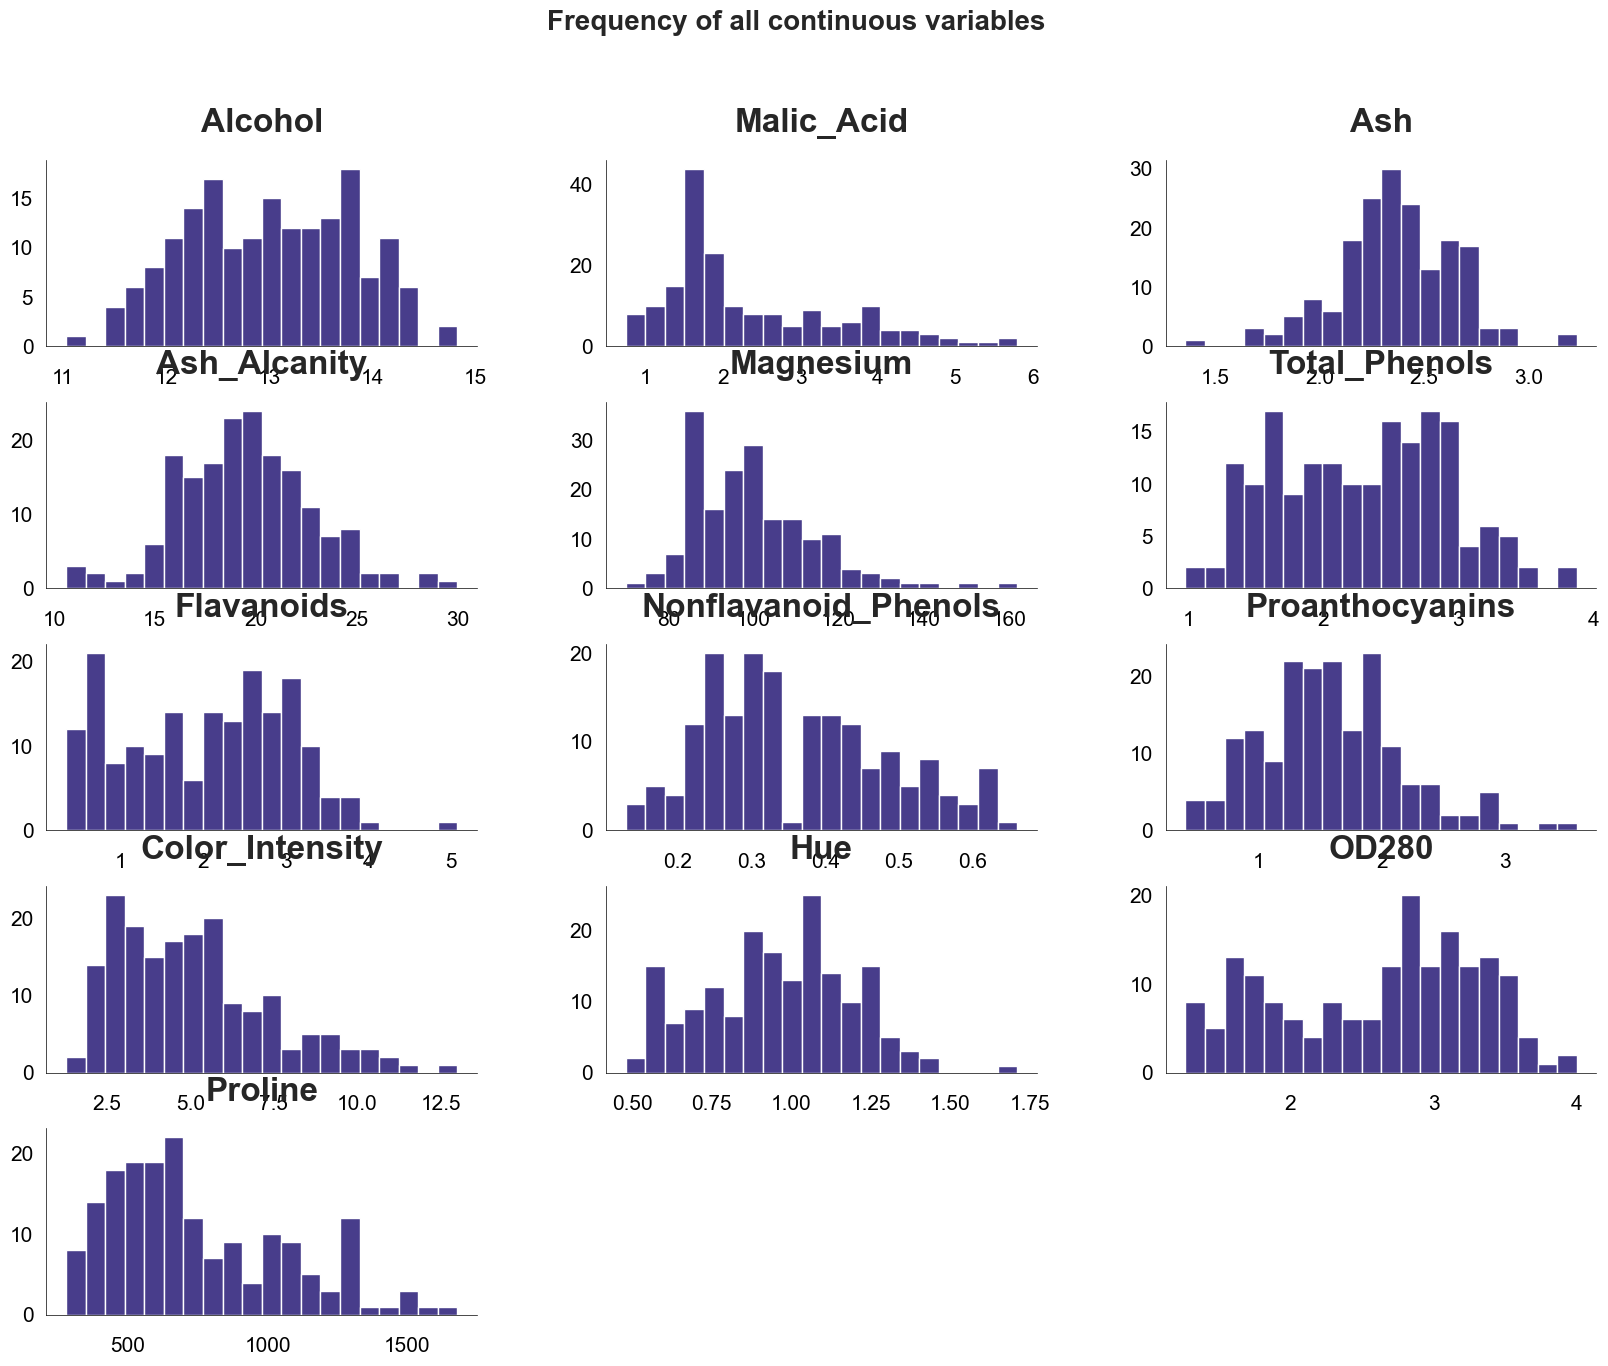

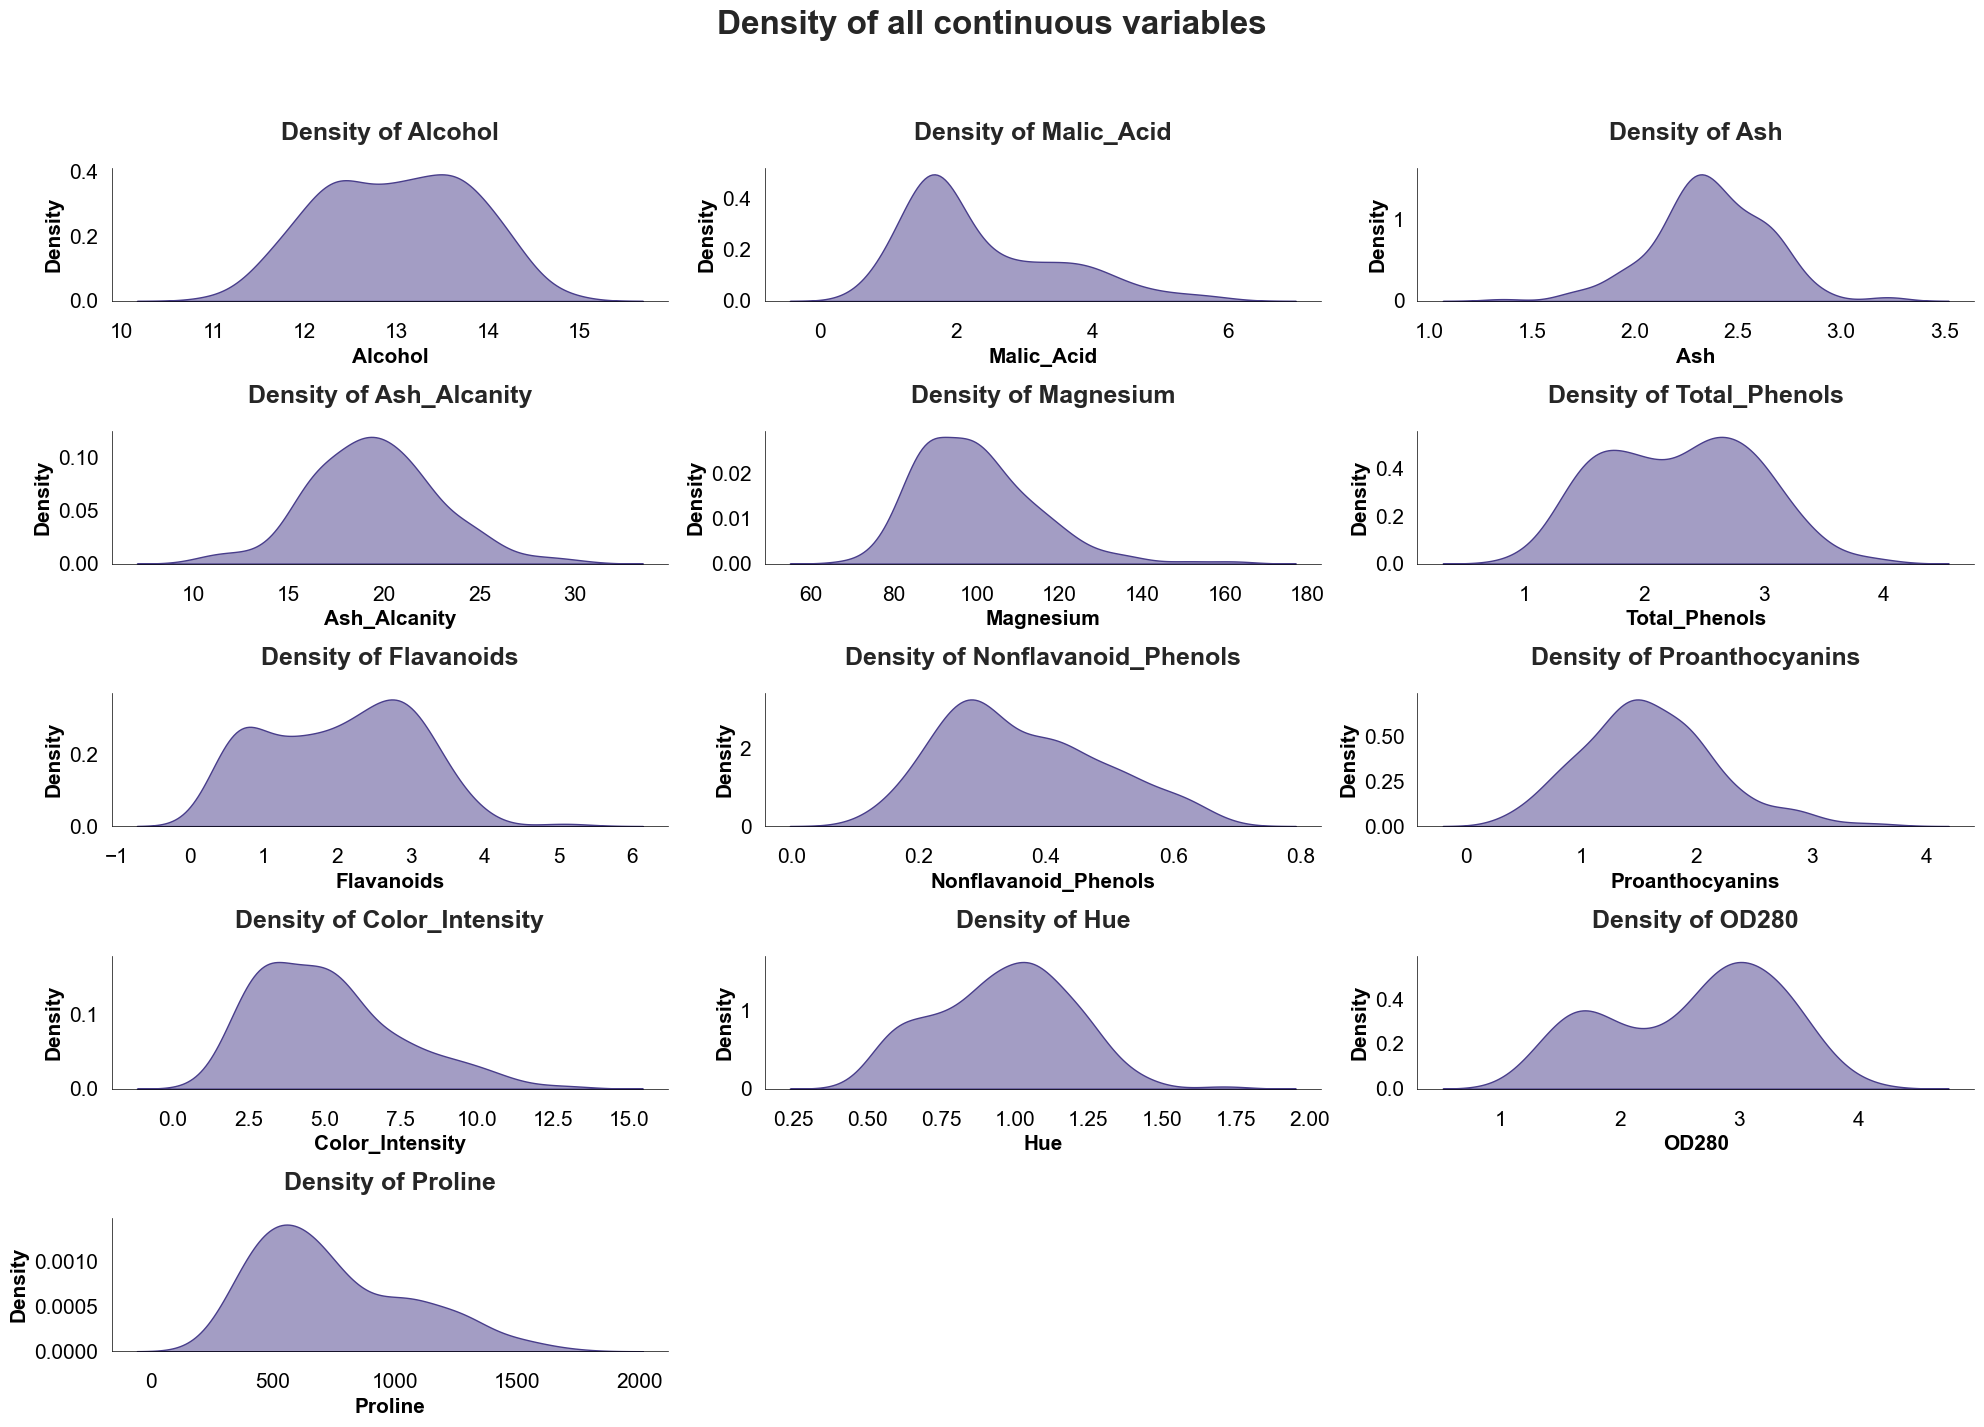

In [37]:
# Plotar histogramas
plot_histograms(df_wine)

# Plotar densidades
plot_densities(df_wine)

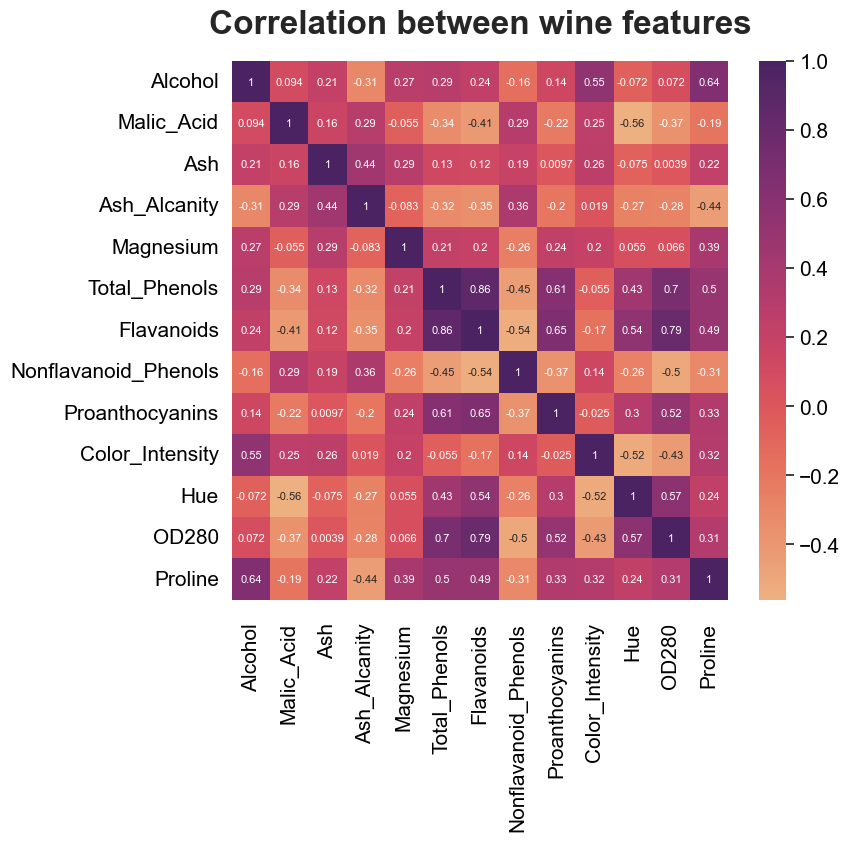

In [38]:
plt.figure(figsize=(8,7))
sns.heatmap(df_wine.corr(), annot=True, annot_kws={"fontsize":8}, cmap="flare")
plt.title("Correlation between wine features")
plt.show()

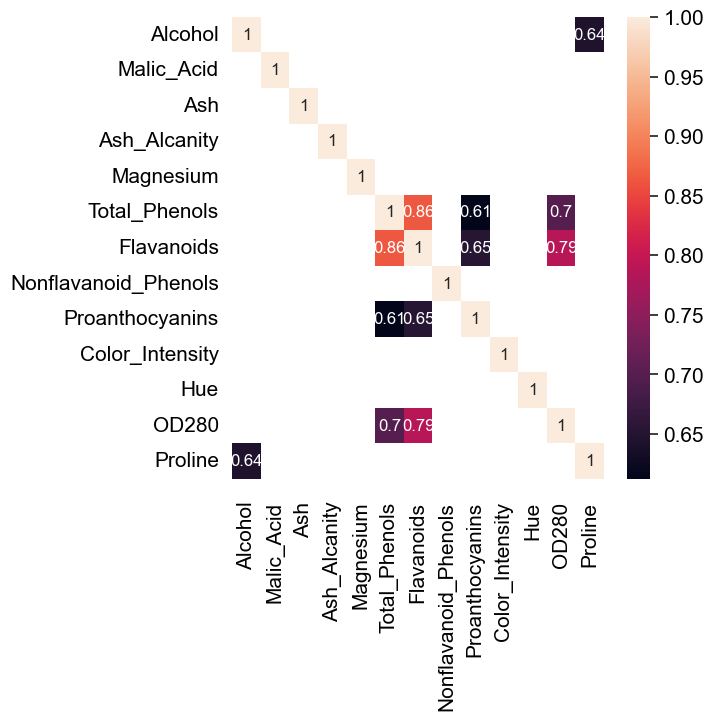

In [39]:
corr =df_wine.corr().abs()
high_corr =corr[(corr)>0.6]
plt.figure(figsize =(6,6))
sns.heatmap(high_corr ,annot=True)
plt.show()

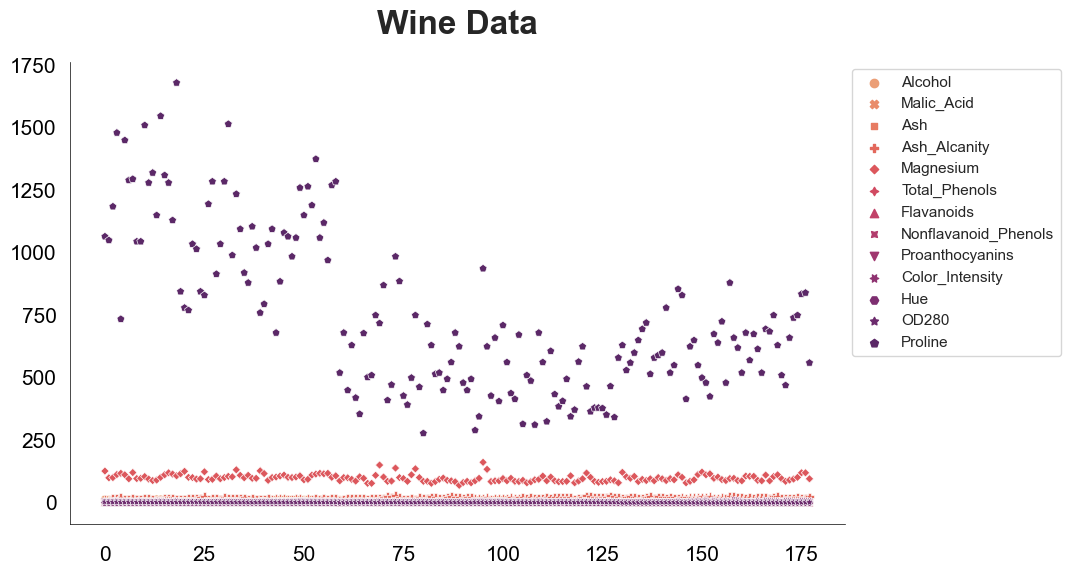

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= df_wine,palette='flare')
plt.title('Wine Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [41]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_wine)


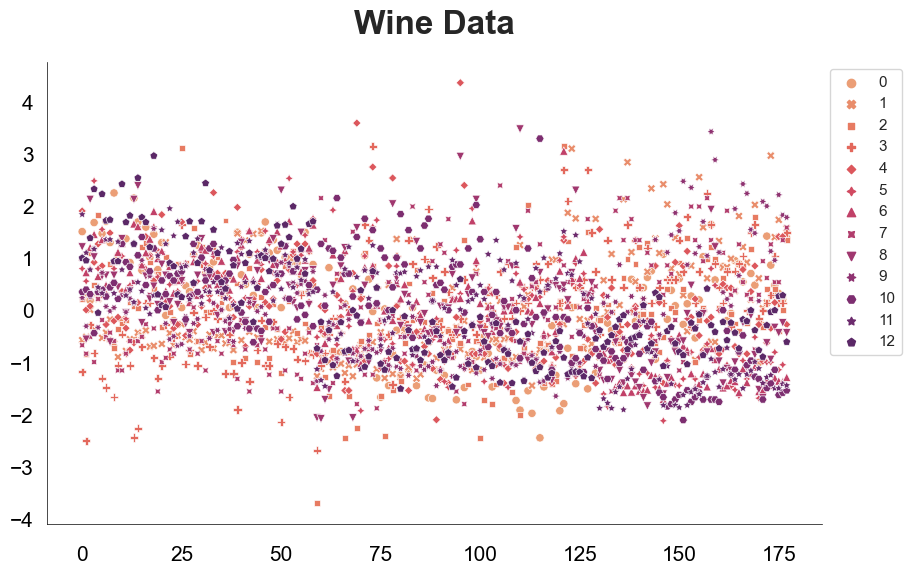

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= X_standardized,palette='flare')
plt.title('Wine Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

x_train, test = train_test_split(X_standardized, test_size=0.4,random_state=42 )
x_val, x_test = train_test_split(test, test_size= 0.5, random_state=42)

In [44]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

K-means Clustering ¶
K-Means clustering is a partitioning method that aims to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean.

In [45]:
k_means = KMeans(n_clusters=3, n_init=5)

labels_train = k_means.fit_predict(x_train)
train_kmeans_avg = silhouette_score(x_train, labels_train)

labels_validation = k_means.predict(x_val)
val_kmeans_avg = silhouette_score(x_val, labels_validation)

labels_test = k_means.predict(x_test)
test_kmeans_avg = silhouette_score(x_test, labels_test)

results = []

results.append({'Model Name' : 'Kmeans',
                'Training Set ': train_kmeans_avg,
                'Validation Set' : val_kmeans_avg,
                 'Testing Set': test_kmeans_avg})

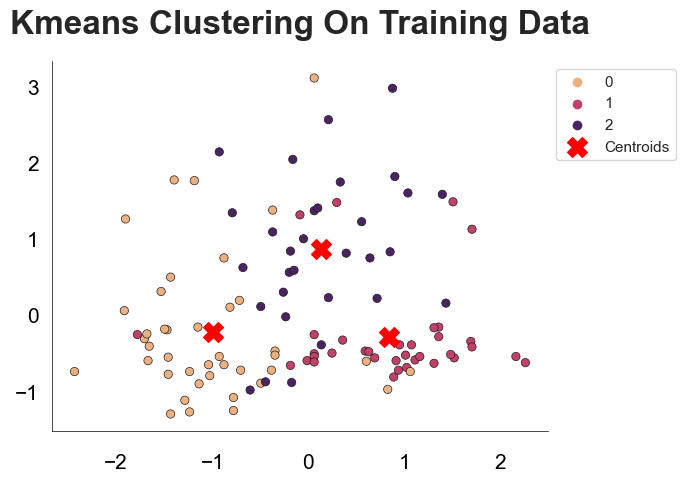

Silhouette Score on Training Set: 0.2808620526436533


In [46]:
sns.scatterplot(x=x_train[:,0], y= x_train[:,1], data= x_train, hue=labels_train,palette='flare',edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f'Silhouette Score on Training Set: {train_kmeans_avg}')

Agglomerative Clustering a hierarchical clustering algorithm ¶
Agglomerative Clustering is a hierarchical clustering algorithm that builds a hierarchy of clusters. The algorithm starts with each data point as a single cluster and successively merges the closest pairs of clusters until a single cluster containing all data points is formed. This hierarchical structure is often represented as a dendrogram.

In [47]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

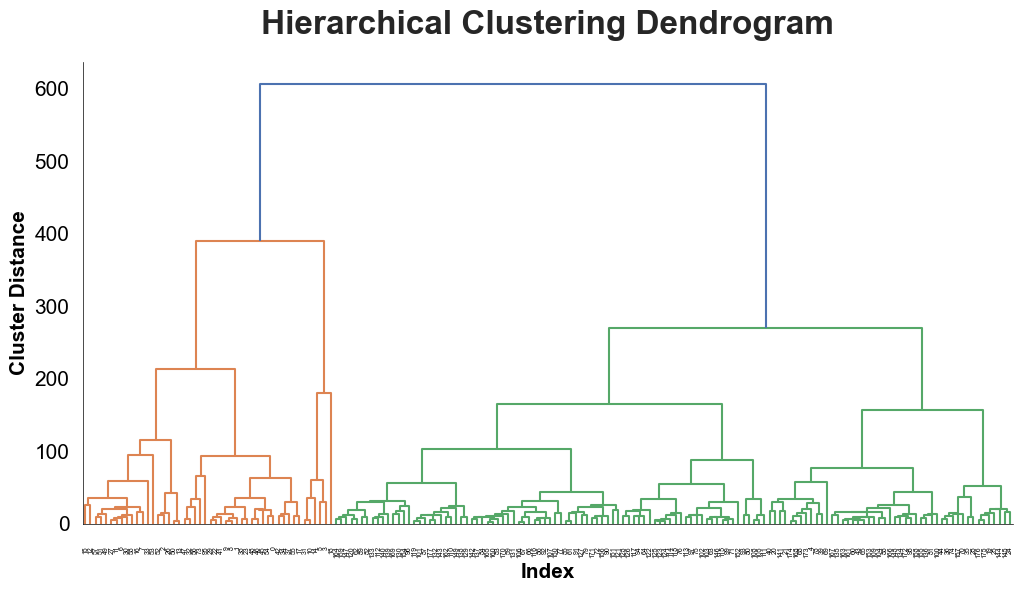

In [48]:
plt.figure(figsize=(12,6))
linked = linkage(df_wine, method='centroid')
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Cluster Distance")
plt.show()

In [49]:
model = AgglomerativeClustering(n_clusters=3)

labels_train_A = model.fit_predict(x_train)
silhouette_avg_train = silhouette_score(x_train, labels_train_A)

labels_validation_A = model.fit_predict(x_val)
silhouette_avg_val = silhouette_score(x_val, labels_validation_A)

labels_test_A = model.fit_predict(x_test)
silhouette_avg_test = silhouette_score(x_test, labels_test_A)

results.append({'Model Name' : 'Agglomerative Clustering',
                'Training Set ': silhouette_avg_train,
                'Validation Set' : silhouette_avg_val,
                 'Testing Set': silhouette_avg_test})

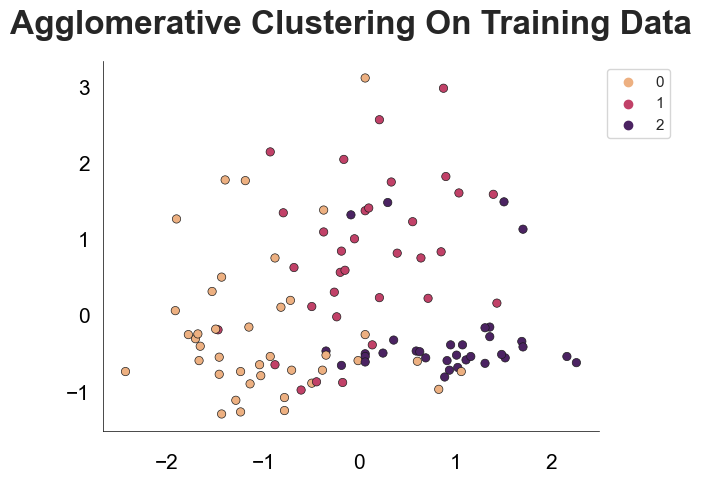

In [50]:
sns.scatterplot(x=x_train[:,0], y= x_train[:,1], data= x_train, hue=labels_train_A,palette='flare',edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering On Training Data')
plt.show()

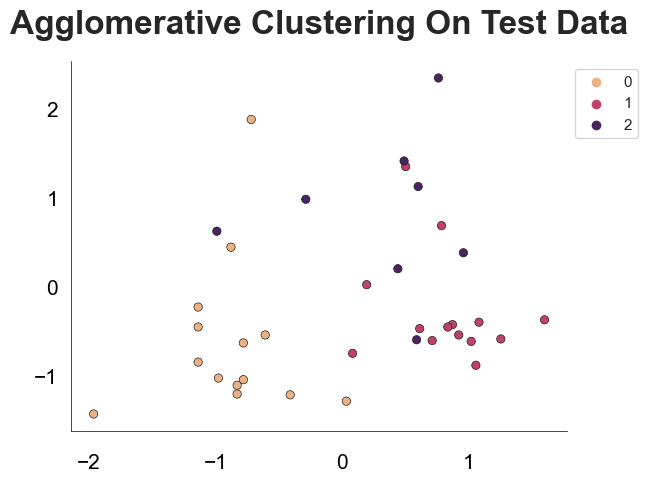

In [51]:
sns.scatterplot(x=x_test[:,0], y= x_test[:,1], data= x_test, hue=labels_test_A, palette='flare',edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering On Test Data')
plt.show()

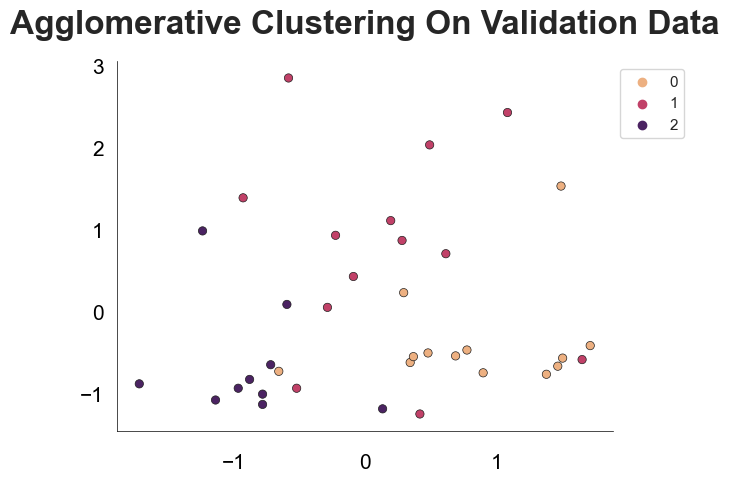

In [52]:
sns.scatterplot(x=x_val[:,0], y= x_val[:,1], data= x_val, hue=labels_validation_A,palette= 'flare',edgecolor='k')
plt.title('Agglomerative Clustering On Validation Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

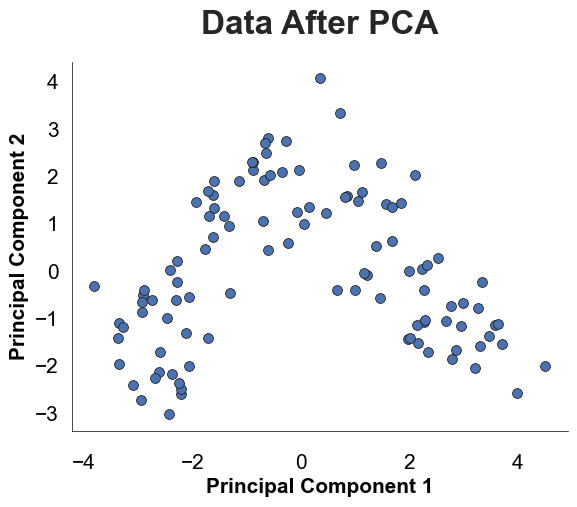

In [53]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.fit_transform(x_val)
x_test_pca = pca.fit_transform(x_test)

# Visualize the data after PCA
sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], data=x_train_pca, marker='o', s=50, edgecolor='k')
plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



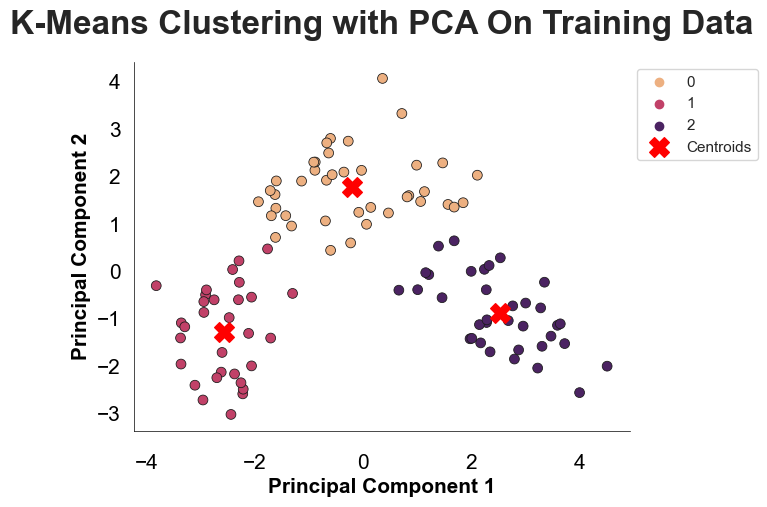

Silhouette train set Score: 0.5603726386000917


In [55]:
# Apply K-Means clustering on the PCA-transformed data
k_means = KMeans(n_clusters=3, random_state=42,n_init=10)
labels = k_means.fit_predict(x_train_pca)
labels_val = k_means.predict(x_val_pca)
labels_test = k_means.predict(x_test_pca)

# Silhouette_score for train, val ,test sets
train_pca_avg = silhouette_score(x_train_pca, labels)
val_pca_avg = silhouette_score(x_val_pca, labels_val)
test_pca_avg = silhouette_score(x_test_pca, labels_test)

# Visualize the clustering result
sns.scatterplot(x= x_train_pca[:, 0], y=x_train_pca[:, 1], data=x_train_pca, hue=labels, marker='o', s=50,palette='flare',edgecolor='k')
#sns.scatterplot(x= k_means.cluster_centers_[:, 0], y= k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA On Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f'Silhouette train set Score: {train_pca_avg}')


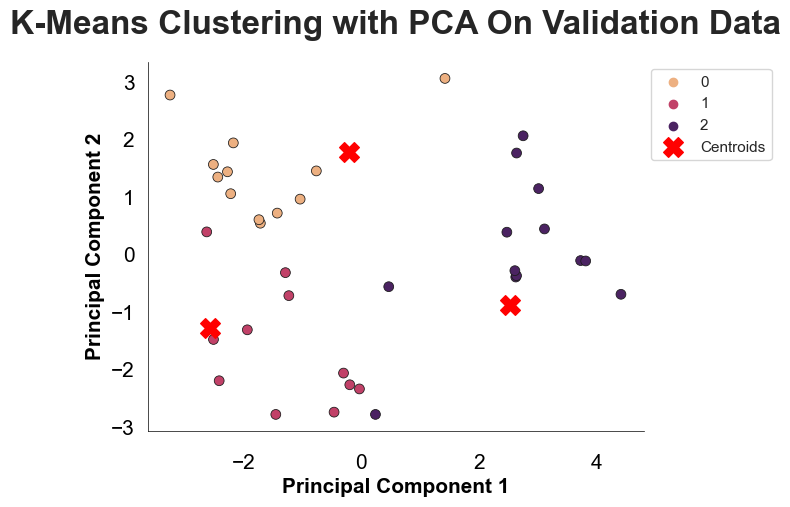

Silhouette Score on Validation Set: 0.4573229114021161


In [57]:
sns.scatterplot(x= x_val_pca[:, 0], y=x_val_pca[:, 1], data=x_val_pca, hue=labels_val, marker='o', s=50, edgecolor='k',palette='flare')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
#sns.scatterplot(x= k_means.cluster_centers_[:, 0], y= k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA On Validation Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


print(f'Silhouette Score on Validation Set: {val_pca_avg}')

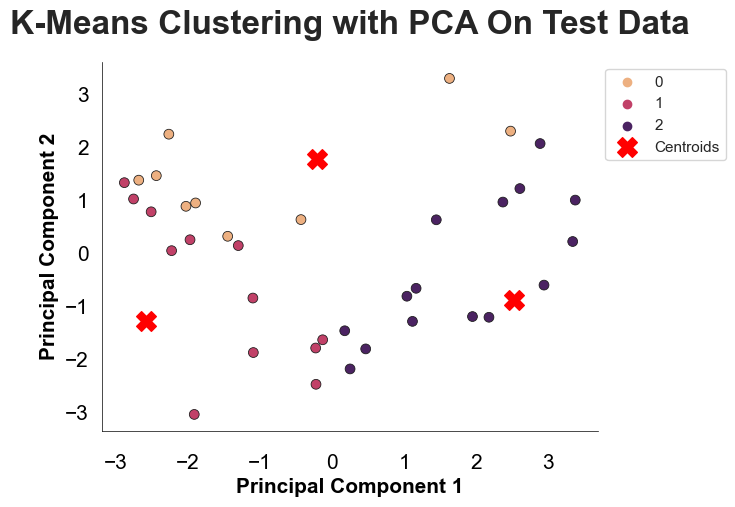

Silhouette Score on Validation Set: 0.20189294490586665


In [58]:
scatter = sns.scatterplot(x= x_test_pca[:, 0], y=x_test_pca[:, 1], data=x_test_pca, hue=labels_test, marker='o', s=50, edgecolor='k',palette='flare')
#sns.scatterplot(x= k_means.cluster_centers_[:, 0], y= k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA On Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f'Silhouette Score on Validation Set: {test_pca_avg}')

In [59]:
results.append({'Model Name' : 'PCA with Kmeans',
                'Training Set ': train_pca_avg,
                'Validation Set' : val_pca_avg,
                 'Testing Set': test_pca_avg})

results_df = pd.DataFrame(results)

print('\033[1m' + '\nSilhouette Score for Models:' +'\033[0m')
display(results_df)


Silhouette Score for Models:


,Model Name,Training Set,Validation Set,Testing Set
0,Kmeans,0.280862,0.268975,0.291732
1,Agglomerative Clustering,0.275638,0.271731,0.291732
2,PCA with Kmeans,0.560373,0.457323,0.201893
